## S15 T01: Visualització interactiva amb ElasticSearch Stack

I will use a database about socio-economic profiles in different countries in 2017. First, I need to pre-process the data.

In [1]:
import numpy as np
import pandas as pd

In [17]:
df = pd.read_csv('/Users/Diana/Downloads/soci_econ_country_profiles.csv')
df

,Unnamed: 0,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),...,"Inflation, consumer prices (annual %)","Life expectancy at birth, female (years)","Life expectancy at birth, male (years)","Life expectancy at birth, total (years)",Military expenditure (% of GDP),"Population, female","Population, male",Tax revenue (% of GDP),"Taxes on income, profits and capital gains (% of revenue)",Urban population (% of total population)_y
0,0,Argentina,SouthAmerica,2780400,44271,16.2,95.9,632343,2.4,14564.5,...,NaN,79.726,72.924,76.372000,0.856138,22572521.0,21472290.0,10.955501,12.929913,91.749
1,1,Australia,Oceania,7692060,24451,3.2,99.3,1230859,2.4,51352.2,...,1.948647,84.600,80.500,82.500000,2.007966,12349632.0,12252228.0,21.915859,64.110306,85.904
2,2,Austria,WesternEurope,83871,8736,106.0,96.2,376967,1.0,44117.7,...,2.081269,84.000,79.400,81.643902,0.756179,4478340.0,4319226.0,25.355237,27.024073,58.094
3,3,Belarus,EasternEurope,207600,9468,46.7,87.0,54609,-3.9,5750.8,...,6.031837,79.200,69.300,74.129268,1.162417,5077542.0,4420722.0,13.019006,2.933101,78.134
4,4,Belgium,WesternEurope,30528,11429,377.5,97.3,455107,1.5,40277.8,...,2.125971,83.900,79.200,81.492683,0.910371,5766141.0,5609017.0,23.399721,33.727746,97.961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,61,United Arab Emirates,WesternAsia,83600,9400,112.4,262.4,370296,3.8,40438.8,...,1.966826,79.008,76.966,77.647000,NaN,2891723.0,6595480.0,0.066457,NaN,86.248
62,62,United Kingdom,NorthernEurope,242495,66182,273.6,97.4,2858003,2.2,44162.4,...,2.557756,83.100,79.500,81.256098,1.771094,33464674.0,32594185.0,25.523504,33.227524,83.143
63,63,United States of America,NorthernAmerica,9833517,324460,35.5,98.0,18036648,2.6,56053.8,...,2.130110,81.100,76.100,78.539024,3.109010,164193686.0,160791853.0,11.764267,49.600037,82.058
64,64,Venezuela (Bolivarian Republic of),SouthAmerica,912050,31977,36.3,99.0,344331,-6.2,11068.9,...,NaN,76.194,68.523,72.246000,0.487844,14843348.0,14547061.0,NaN,NaN,88.183


In [18]:
df.columns

Index(['Unnamed: 0', 'country', 'Region', 'Surface area (km2)',
       'Population in thousands (2017)', 'Population density (per km2, 2017)',
       'Sex ratio (m per 100 f, 2017)',
       'GDP: Gross domestic product (million current US$)',
       'GDP growth rate (annual %, const. 2005 prices)',
       'GDP per capita (current US$)', 'Economy: Agriculture (% of GVA)',
       'Economy: Industry (% of GVA)',
       'Economy: Services and other activity (% of GVA)',
       'Employment: Agriculture (% of employed)',
       'Employment: Industry (% of employed)',
       'Employment: Services (% of employed)',
       'Unemployment (% of labour force)',
       'Labour force participation (female/male pop. %)',
       'Agricultural production index (2004-2006=100)',
       'Food production index (2004-2006=100)',
       'International trade: Exports (million US$)',
       'International trade: Imports (million US$)',
       'International trade: Balance (million US$)',
       'Balance of pa

In [21]:
df = df.drop('Unnamed: 0', axis=1)

In [22]:
df

,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),...,"Inflation, consumer prices (annual %)","Life expectancy at birth, female (years)","Life expectancy at birth, male (years)","Life expectancy at birth, total (years)",Military expenditure (% of GDP),"Population, female","Population, male",Tax revenue (% of GDP),"Taxes on income, profits and capital gains (% of revenue)",Urban population (% of total population)_y
0,Argentina,SouthAmerica,2780400,44271,16.2,95.9,632343,2.4,14564.5,6.0,...,NaN,79.726,72.924,76.372000,0.856138,22572521.0,21472290.0,10.955501,12.929913,91.749
1,Australia,Oceania,7692060,24451,3.2,99.3,1230859,2.4,51352.2,2.5,...,1.948647,84.600,80.500,82.500000,2.007966,12349632.0,12252228.0,21.915859,64.110306,85.904
2,Austria,WesternEurope,83871,8736,106.0,96.2,376967,1.0,44117.7,1.3,...,2.081269,84.000,79.400,81.643902,0.756179,4478340.0,4319226.0,25.355237,27.024073,58.094
3,Belarus,EasternEurope,207600,9468,46.7,87.0,54609,-3.9,5750.8,7.5,...,6.031837,79.200,69.300,74.129268,1.162417,5077542.0,4420722.0,13.019006,2.933101,78.134
4,Belgium,WesternEurope,30528,11429,377.5,97.3,455107,1.5,40277.8,0.7,...,2.125971,83.900,79.200,81.492683,0.910371,5766141.0,5609017.0,23.399721,33.727746,97.961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,United Arab Emirates,WesternAsia,83600,9400,112.4,262.4,370296,3.8,40438.8,0.7,...,1.966826,79.008,76.966,77.647000,NaN,2891723.0,6595480.0,0.066457,NaN,86.248
62,United Kingdom,NorthernEurope,242495,66182,273.6,97.4,2858003,2.2,44162.4,0.7,...,2.557756,83.100,79.500,81.256098,1.771094,33464674.0,32594185.0,25.523504,33.227524,83.143
63,United States of America,NorthernAmerica,9833517,324460,35.5,98.0,18036648,2.6,56053.8,1.0,...,2.130110,81.100,76.100,78.539024,3.109010,164193686.0,160791853.0,11.764267,49.600037,82.058
64,Venezuela (Bolivarian Republic of),SouthAmerica,912050,31977,36.3,99.0,344331,-6.2,11068.9,5.3,...,NaN,76.194,68.523,72.246000,0.487844,14843348.0,14547061.0,NaN,NaN,88.183


In [23]:
df.to_csv('socioeconomic', index=False)

### Exercici 1

Descarrega't Kibana i mostra algunes gràfiques utilitzant conjunts de dades d'Exemple.

Importing the data to Kibana:

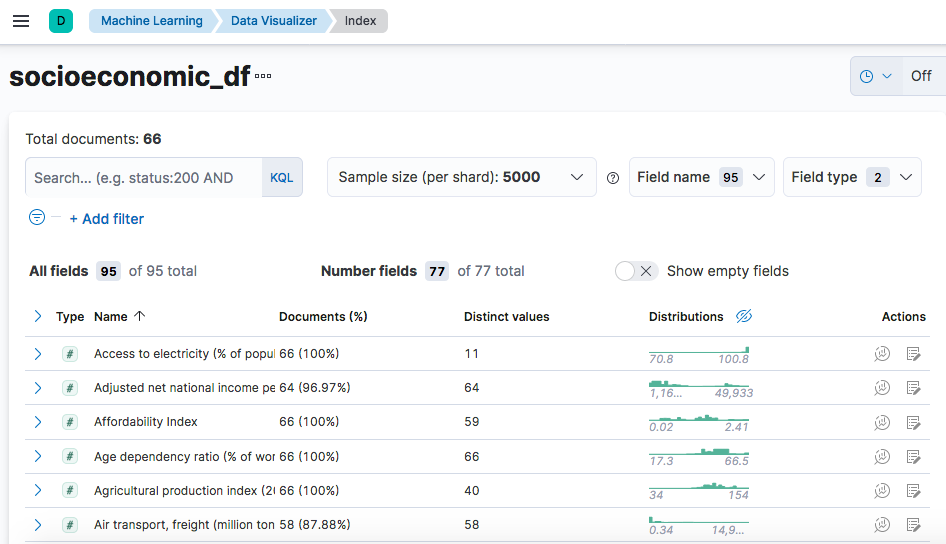

Creating visualizations through Lens:

**Top CO2 emissions per country:**

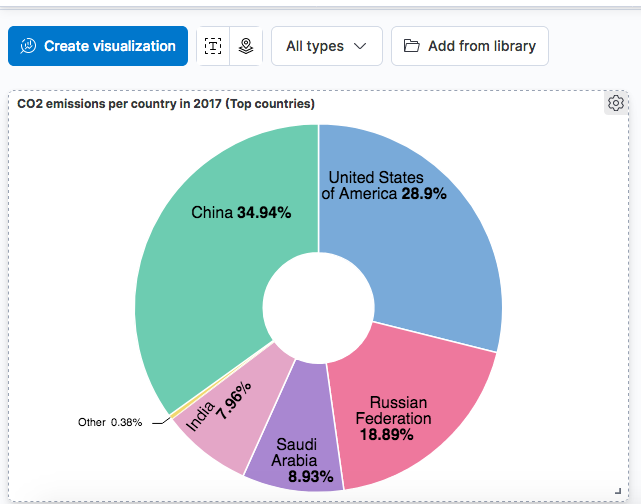

**Countries with the highest cost of living:**

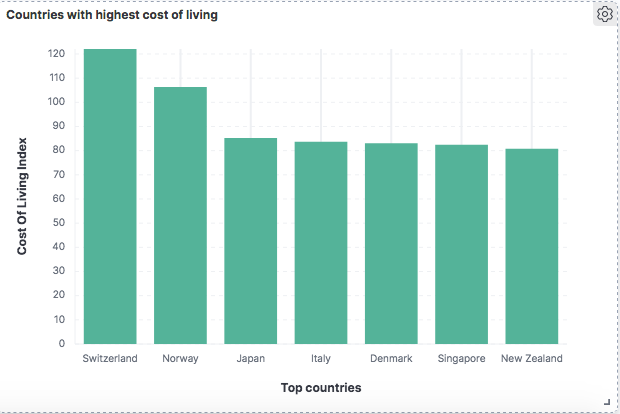

**Health expenditure vs Life expectancy:**

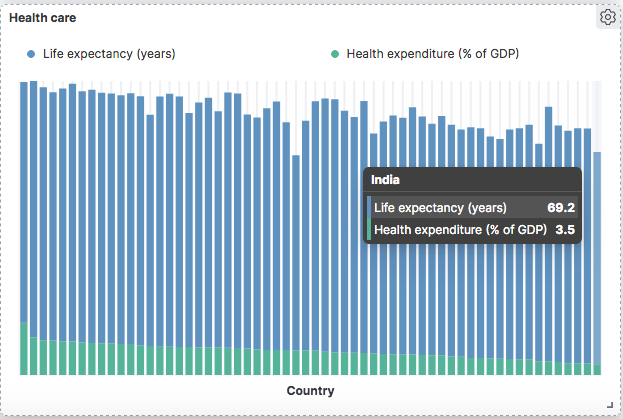

**% of exported goods by country (top countries):**

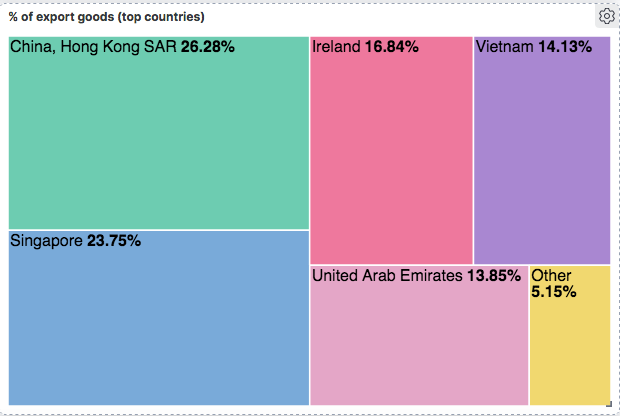

### Nivell 2

Implementa un dashboard que visualitzi interactivament les dades que triïs.

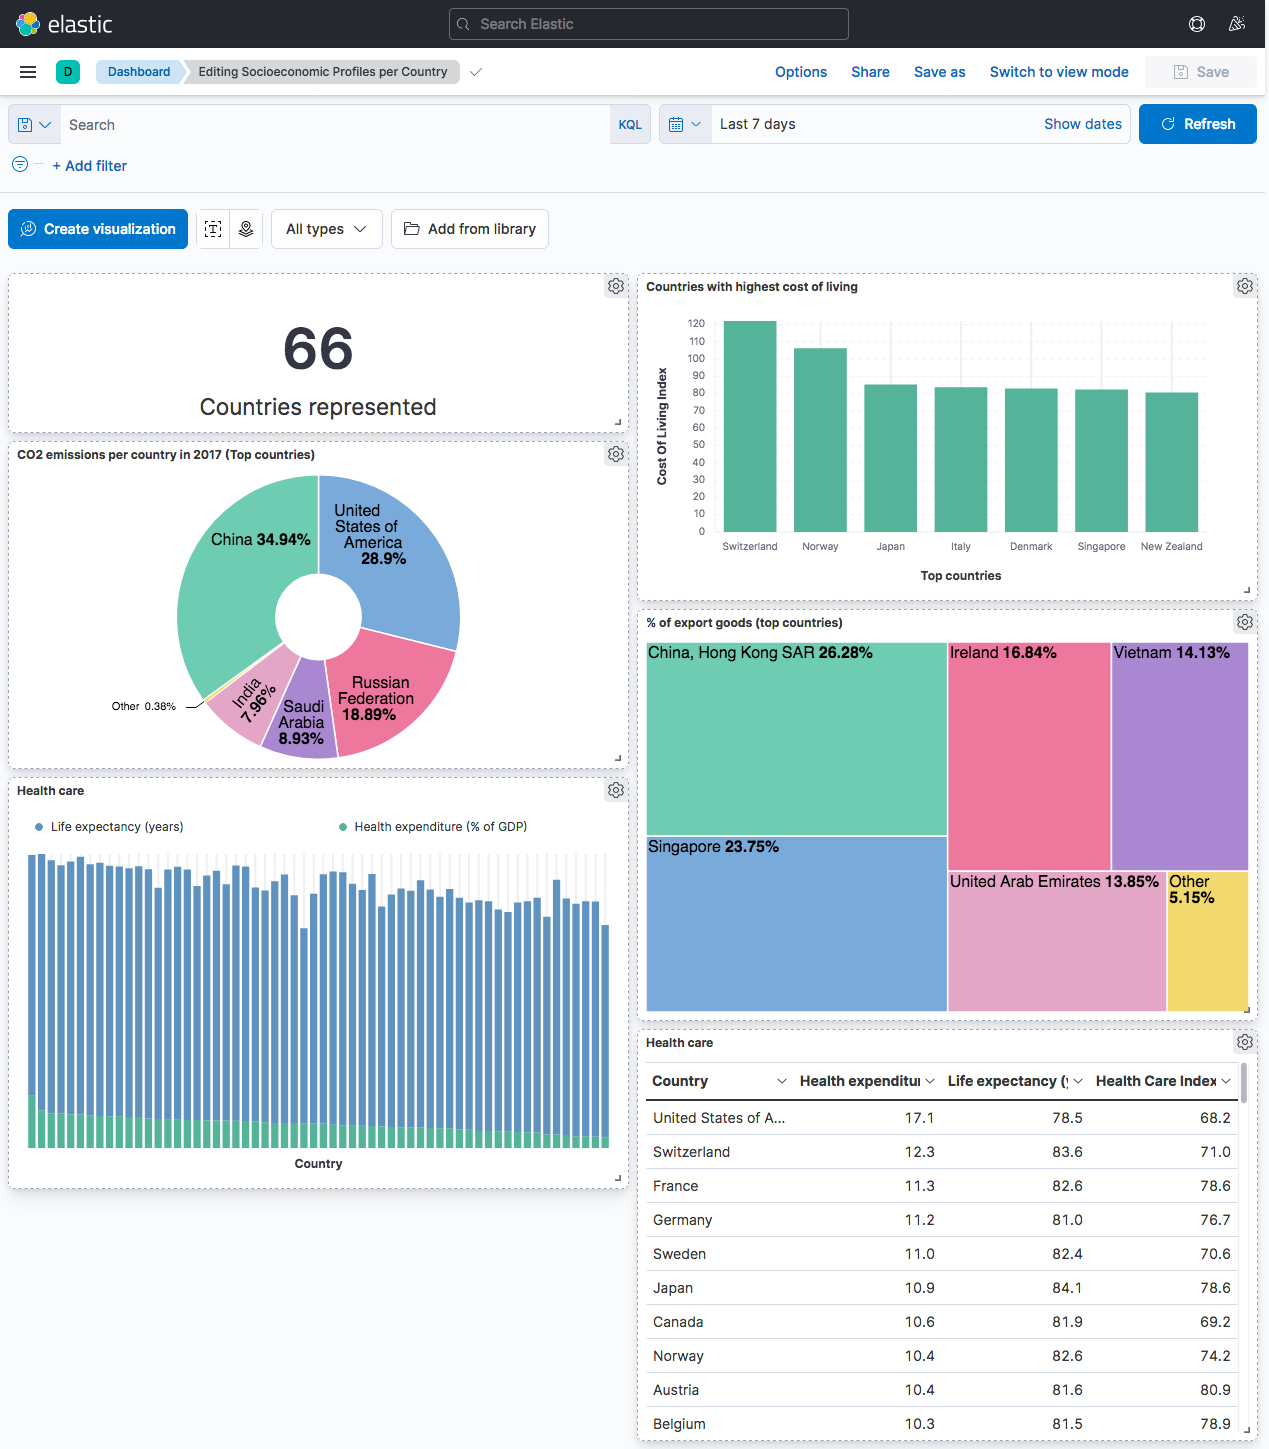

### Exercici 3

Implementa un dashboard que generi gràfics utilitzant cadascun dels diferents tipus de gràfics que ofereix Kibana.

*I will use the example database included in Kibana*

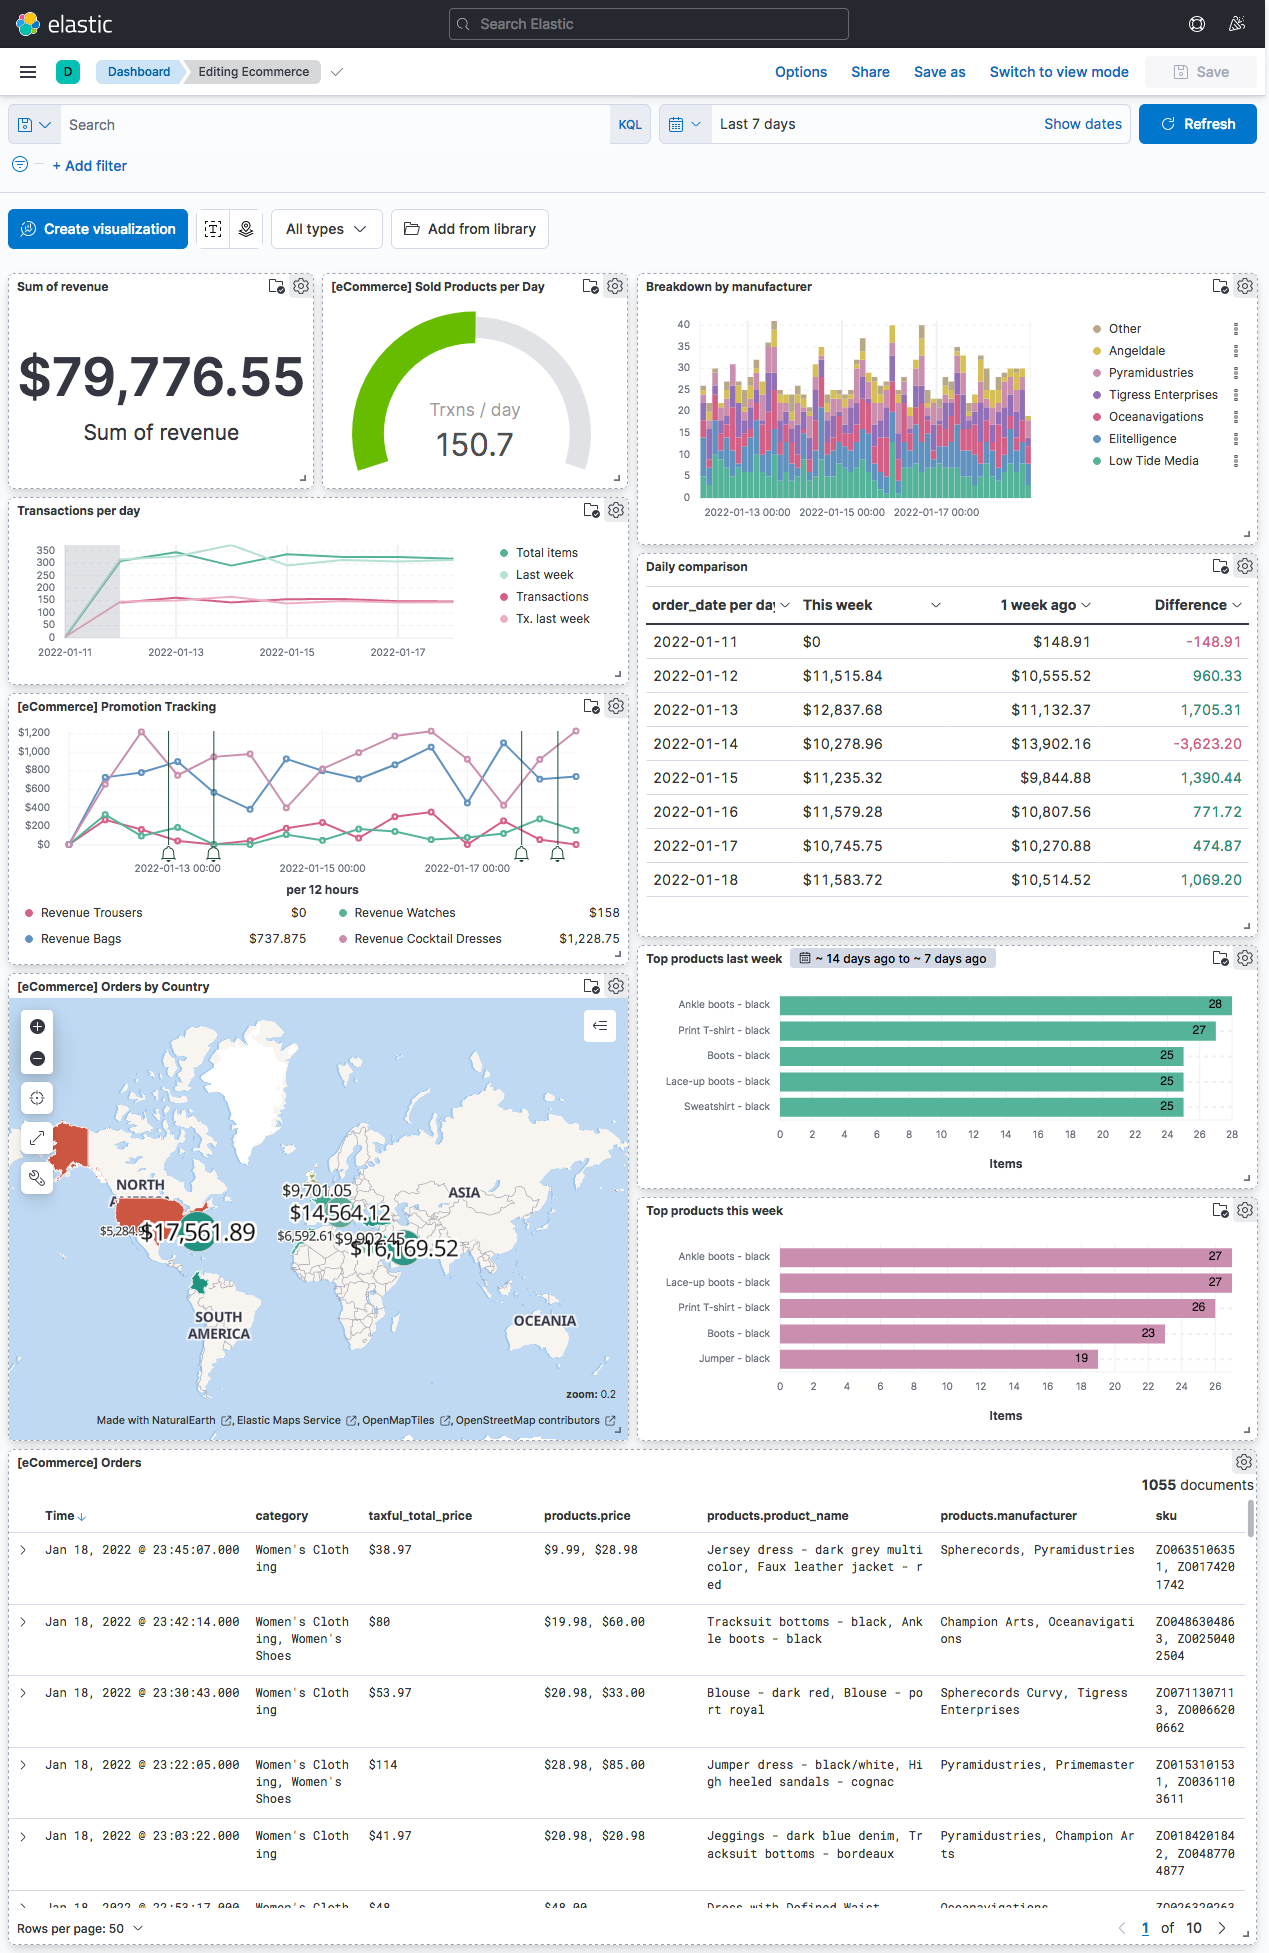